<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/1BM23CS412_MLlabexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A streaming service may collect the following data about individuals.
Minutes watched per day
Total viewing sessions per week
Number of unique shows viewed per month
Streaming services often use analysis to identify viewers who have similar behaviour.
a) Identify and develop an efficient machine learning model for the problem with suitable dataset.
b) Outline the missing values or outliers
c) Measure the performance of the model with appropriate metrics
d) Compare the developed model with other ML model for the performance efficiency.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from scipy.stats import mode
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({
    'Minutes_Watched_Per_Day': [180, 45, 120, 90, np.nan, 60, 1000, 130, 85, 170, 300],
    'Viewing_Sessions_Per_Week': [14, 4, 10, 7, 20, np.nan, 2, 11, 8, 15, 100],
    'Unique_Shows_Per_Month': [6, 2, 5, 3, 10, 3, 4, 5, np.nan, 4, 60]
})
df

,Minutes_Watched_Per_Day,Viewing_Sessions_Per_Week,Unique_Shows_Per_Month
0,180.0,14.0,6.0
1,45.0,4.0,2.0
2,120.0,10.0,5.0
3,90.0,7.0,3.0
4,NaN,20.0,10.0
5,60.0,NaN,3.0
6,1000.0,2.0,4.0
7,130.0,11.0,5.0
8,85.0,8.0,NaN
9,170.0,15.0,4.0


In [ ]:
df.describe()

,Minutes_Watched_Per_Day,Viewing_Sessions_Per_Week,Unique_Shows_Per_Month
count,10.000000,10.000000,10.000000
mean,218.000000,19.100000,10.200000
std,284.470268,28.919236,17.637082
min,45.000000,2.000000,2.000000
25%,86.250000,7.250000,3.250000
50%,125.000000,10.500000,4.500000
75%,177.500000,14.750000,5.750000
max,1000.000000,100.000000,60.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minutes_Watched_Per_Day    10 non-null     float64
 1   Viewing_Sessions_Per_Week  10 non-null     float64
 2   Unique_Shows_Per_Month     10 non-null     float64
dtypes: float64(3)
memory usage: 396.0 bytes


In [ ]:
df.isnull().sum()

,0
Minutes_Watched_Per_Day,1
Viewing_Sessions_Per_Week,1
Unique_Shows_Per_Month,1


In [ ]:
df = df.interpolate(method='linear', limit_direction='forward')
df.isnull().sum()

,0
Minutes_Watched_Per_Day,0
Viewing_Sessions_Per_Week,0
Unique_Shows_Per_Month,0


In [ ]:
df

,Minutes_Watched_Per_Day,Viewing_Sessions_Per_Week,Unique_Shows_Per_Month
0,180.0,14.0,6.0
1,45.0,4.0,2.0
2,120.0,10.0,5.0
3,90.0,7.0,3.0
4,75.0,20.0,10.0
5,60.0,11.0,3.0
6,650.0,2.0,4.0
7,130.0,11.0,5.0
8,85.0,8.0,4.5
9,170.0,15.0,4.0


In [ ]:
X = df[['Minutes_Watched_Per_Day', 'Viewing_Sessions_Per_Week', 'Unique_Shows_Per_Month']]

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sse = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

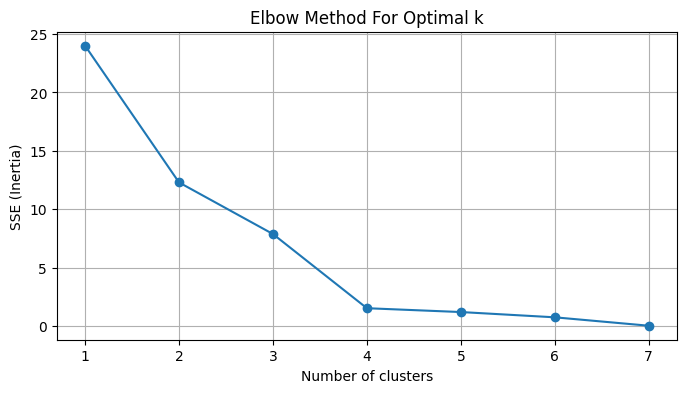

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
predictions = kmeans.predict(X_test_scaled)

In [ ]:
full_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
true_clusters = full_kmeans.fit_predict(scaler.fit_transform(X))

array([1, 0, 1, 0, 2, 0, 3, 1, 0, 1], dtype=int32)

In [ ]:
def map_clusters(true_labels, pred_labels):
    labels = np.zeros_like(pred_labels)
    for i in range(optimal_k):
        mask = (pred_labels == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(true_labels[mask])[0]
    return labels

In [ ]:
mapped_preds = map_clusters(true_clusters[X_test.index], predictions)
accuracy = accuracy_score(true_clusters[X_test.index], mapped_preds)
print(f"Clustering Accuracy: {accuracy:.2f}")

Clustering Accuracy: 1.00


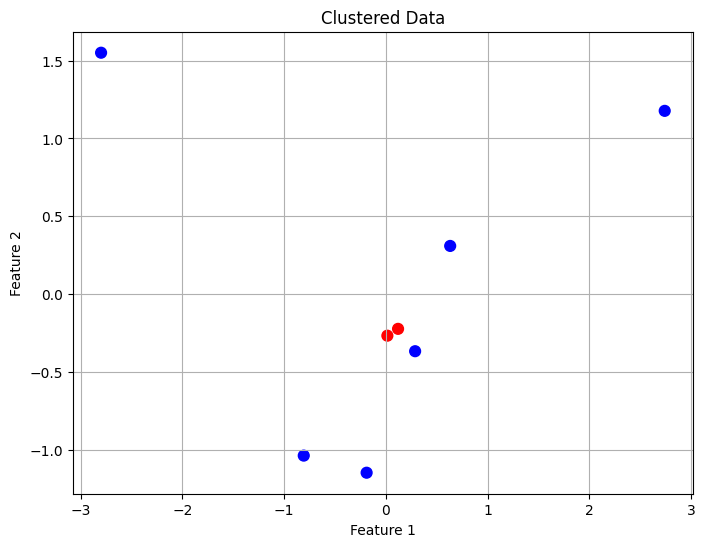

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='bwr', s=60)
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=2)
clusters = dbscan.fit_predict(X_train_scaled)

In [ ]:
def map_clusters(true_labels, pred_labels):
    labels = np.zeros_like(pred_labels)
    for i in range(np.max(pred_labels)+1):
        mask = (pred_labels == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(true_labels[mask])[0]
    labels[pred_labels == -1] = -1
    return labels

In [ ]:
subset_indices = X_test.index
true_subset = true_clusters[subset_indices]
pred_subset = predictions

mapped_preds = map_clusters(true_subset, pred_subset)

In [ ]:
mask = mapped_preds != -1
accuracy = accuracy_score(true_clusters[X_test.index][mask], mapped_preds[mask])

print(f"Clustering Accuracy (excluding noise): {accuracy:.2f}")
print("DBSCAN cluster labels:", clusters)
print("Mapped cluster labels:", mapped_preds)

Clustering Accuracy (excluding noise): 1.00
DBSCAN cluster labels: [-1 -1  0  0 -1 -1 -1 -1]
Mapped cluster labels: [0 0]


(8, 3)
8


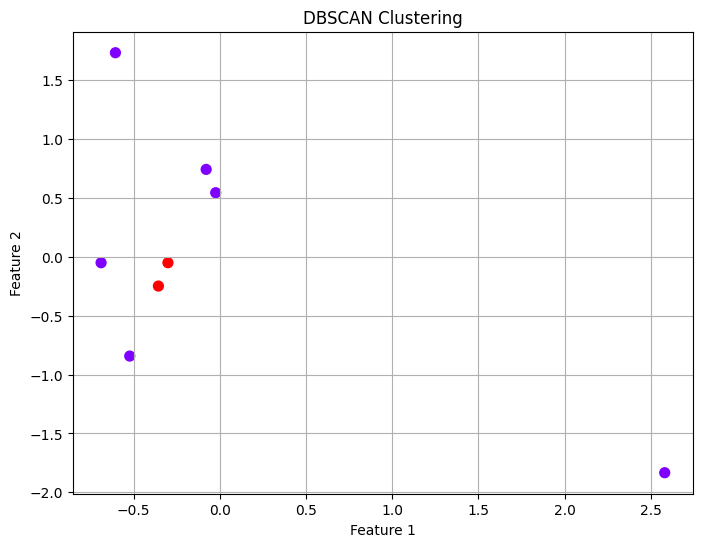

In [80]:
import matplotlib.pyplot as plt

print(X_train_scaled.shape)
print(len(clusters))

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters.astype(int), cmap='rainbow', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()